In [1]:
import pandas as pd
import numpy as np

In [2]:
metadata=pd.read_csv('metadata.csv')

In [3]:
metadata.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
import shutil,os
for (i,row) in metadata.iterrows():
    if row['finding']=='COVID-19' and row['view']=='PA':
        filename=row['filename']
        path='./images/'+filename
        shutil.copy(path, './Virus')
        
        
    

In [4]:
import cv2
import os
import glob
img_dir = "./Infected/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)  
    data.append(img)

In [5]:
len(data)

142

In [7]:
import matplotlib.pyplot as plt

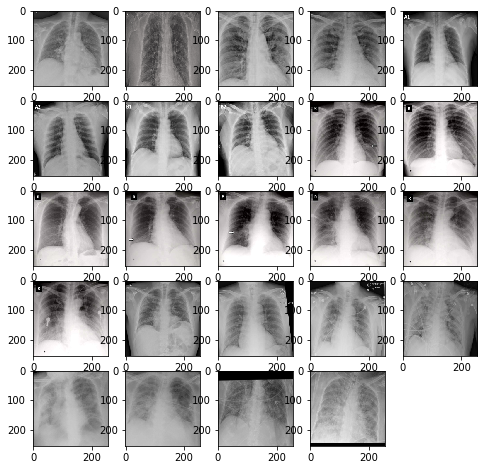

In [8]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1,columns*rows ):
    img = data[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

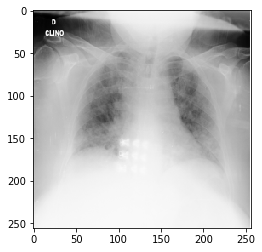

In [9]:
plt.imshow(data[0])

In [24]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
#x = img_to_array(data)  # this is a Numpy array with shape (3, 150, 150)
#x = x.reshape((142,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i=0
for batch in datagen.flow(x, 
             save_to_dir='COIVD_Aug/',save_prefix='aug',save_format='jpeg'  ):
    i+=1
    if i>1:
        break

In [6]:
img_dir = "./COIVD_AUg/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data1 = []
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)  
    data1.append(img)

In [7]:
corona_hack=pd.read_csv('D:\ML\Coroa_hack\Chest_xray_Corona_metadata.csv')
i=0
normal = []
for idex,row in corona_hack.iterrows():
    if row['Label']=='Normal' and i<100:
        i+=1
        img_dir = "D:\ML\Coroa_hack\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\Train"  
        data_path = os.path.join(img_dir,row['X_ray_image_name'])
        img = cv2.imread(data_path)
        img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)  
        normal.append(img)

        

In [8]:
train=data+data1+normal
print(len(train))

306


In [9]:
label=[0 for i in range((len(data)+len(data1)))]
print(len(label))

206


In [10]:
final=np.array(train)
print(final.shape)

(306, 256, 256, 3)


In [11]:
labels=[1 for i in range(len(normal))]
final_labels=label+labels

In [12]:
final_labels=np.array(final_labels)

In [13]:
final_labels.shape

(306,)

In [14]:
from keras.utils import to_categorical
train_la=to_categorical(final_labels)

Using TensorFlow backend.


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, train_la, test_size=0.33, random_state=42)

In [27]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(256,256,3),pooling=max)

vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False
    
flat=keras.layers.Flatten()(vgg.output)
#dense1=keras.layers.Dense(256,activation='linear')(flat)
output=keras.layers.Dense(2,activation='softmax')(flat)

In [28]:
model=Model(input=vgg.input,output=output)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [29]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
fit=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test))

Train on 205 samples, validate on 101 samples
Epoch 1/5
205/205 [==============================] - 288s 1s/step - loss: 0.8599 - accuracy: 0.9171 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
205/205 [==============================] - 284s 1s/step - loss: 2.4423e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
205/205 [==============================] - 277s 1s/step - loss: 1.0187e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
205/205 [==============================] - 286s 1s/step - loss: 3.2040e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
205/205 [==============================] - 297s 1s/step - loss: 1.8027e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


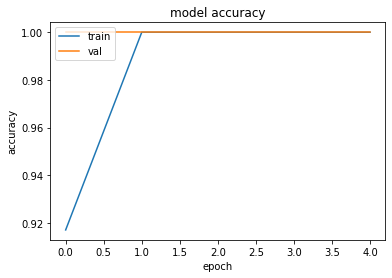

In [35]:
import matplotlib.pyplot as plt
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(256,256,3),pooling=max)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False

In [96]:
img=cv2.imread('IM-0001-0001.jpeg')
img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)  

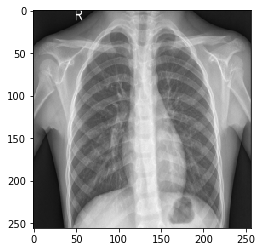

In [97]:
plt.imshow(img)

In [98]:
l=[]
l.append(img1)
img2=np.array(l)
print(img2.shape)

(1, 256, 256, 3)


In [71]:
y=model.predict(img2)

In [74]:
print(np.argmax(y))

0


In [75]:
from keras.applications import ResNet50
resnet=keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=max,
    classes=2,
)

C:\Users\Sree\AppData\Roaming\Python\Python37\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [76]:
output1 = resnet.layers[-1].output
flat = keras.layers.Flatten()(output1)
predictions=keras.layers.Dense(2,activation='softmax')(flat)

In [88]:
print(resnet.input)
res_model=Model(input=resnet.input,output=predictions)

Tensor("input_8:0", shape=(None, 256, 256, 3), dtype=float32)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [89]:
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
res_fit=res_model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=(X_test, y_test))

Train on 205 samples, validate on 101 samples
Epoch 1/5
205/205 [==============================] - 759s 4s/step - loss: 0.0483 - accuracy: 0.9951 - val_loss: 3355.8974 - val_accuracy: 0.7030
Epoch 2/5
205/205 [==============================] - 561s 3s/step - loss: 0.8719 - accuracy: 0.9659 - val_loss: 6361850.9604 - val_accuracy: 0.7030
Epoch 3/5
205/205 [==============================] - 543s 3s/step - loss: 1.1259 - accuracy: 0.9756 - val_loss: 1017154319.2079 - val_accuracy: 0.7030
Epoch 4/5
205/205 [==============================] - 630s 3s/step - loss: 0.3454 - accuracy: 0.9659 - val_loss: 6926967762.3762 - val_accuracy: 0.7030
Epoch 5/5
205/205 [==============================] - 820s 4s/step - loss: 0.0421 - accuracy: 0.9756 - val_loss: 3932467615.6832 - val_accuracy: 0.7030


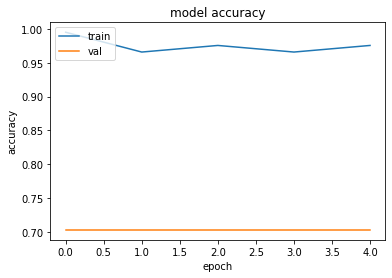

In [91]:
import matplotlib.pyplot as plt
plt.plot(res_fit.history['accuracy'])
plt.plot(res_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [99]:
y=res_model.predict(img2)

In [92]:
res_model.save('reset.h5')

In [94]:
model.save('vgg.h5')

In [100]:
np.argmax(y)

0